## 1. Business understanding

In this project I have predicted the sales of Walmart for 45 stores. The dataset has the weekly sales from February 2010 to December 2012. Other attributes given are weekly tempereature, CPI, Fuel price, unemployment rate. This model will predict the sales of the Walmart if we give the model any different test values that estimate the Sales in dollars. This project aims to give Walmart the precise prediction of sales based on the fuel price, CPI, unemployment and whether there is holisy in that week.

My github link:
https://github.com/sohamshinde-github/Walmart-Sales-Prediction-Using-Random-Forest

## 2. Data Understanding

### 2.1 Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import datetime as dt

### 2.2 Reading csv file/dataset 

In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/10,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12/3/10,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2/4/10,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,9/4/10,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### 2.3 Statistical Analysis

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## 3. Data Preparation

### 3.1 Converting 'Date' to datetime format

In this step, I have converted the column of Date to the date time format, so that it will be easy to visualize the data and use other features in datetime.

In [6]:
import datetime as dt
date = df['Date']
date

0           5/2/10
1          12/2/10
2       19-02-2010
3       26-02-2010
4           5/3/10
           ...    
6430    28-09-2012
6431       5/10/12
6432      12/10/12
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

### 3.2 Counting Holiday and Non-Holiday within 05 Feb 2010 to 26 Dec 2012

In [7]:
holiday = []
not_holiday = []

for num in df['Holiday_Flag']:
    if num==1:
        holiday.append(num)
    else:
        not_holiday.append(num)
        
print('Number of holidays in given dates:',holiday.count(1))
print('Number of non-holidays in given dates:',not_holiday.count(0))

Number of holidays in given dates: 450
Number of non-holidays in given dates: 5985


### 3.3 Splitting the date in day, month and year and importing ML libraries.

In [8]:
# Splitting Date and create new columns (Day, Month, and Year)
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,5/3/10,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Day           6435 non-null   int64  
 9   Month         6435 non-null   int64  
 10  Year          6435 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 553.1+ KB


### 3.4 EDA

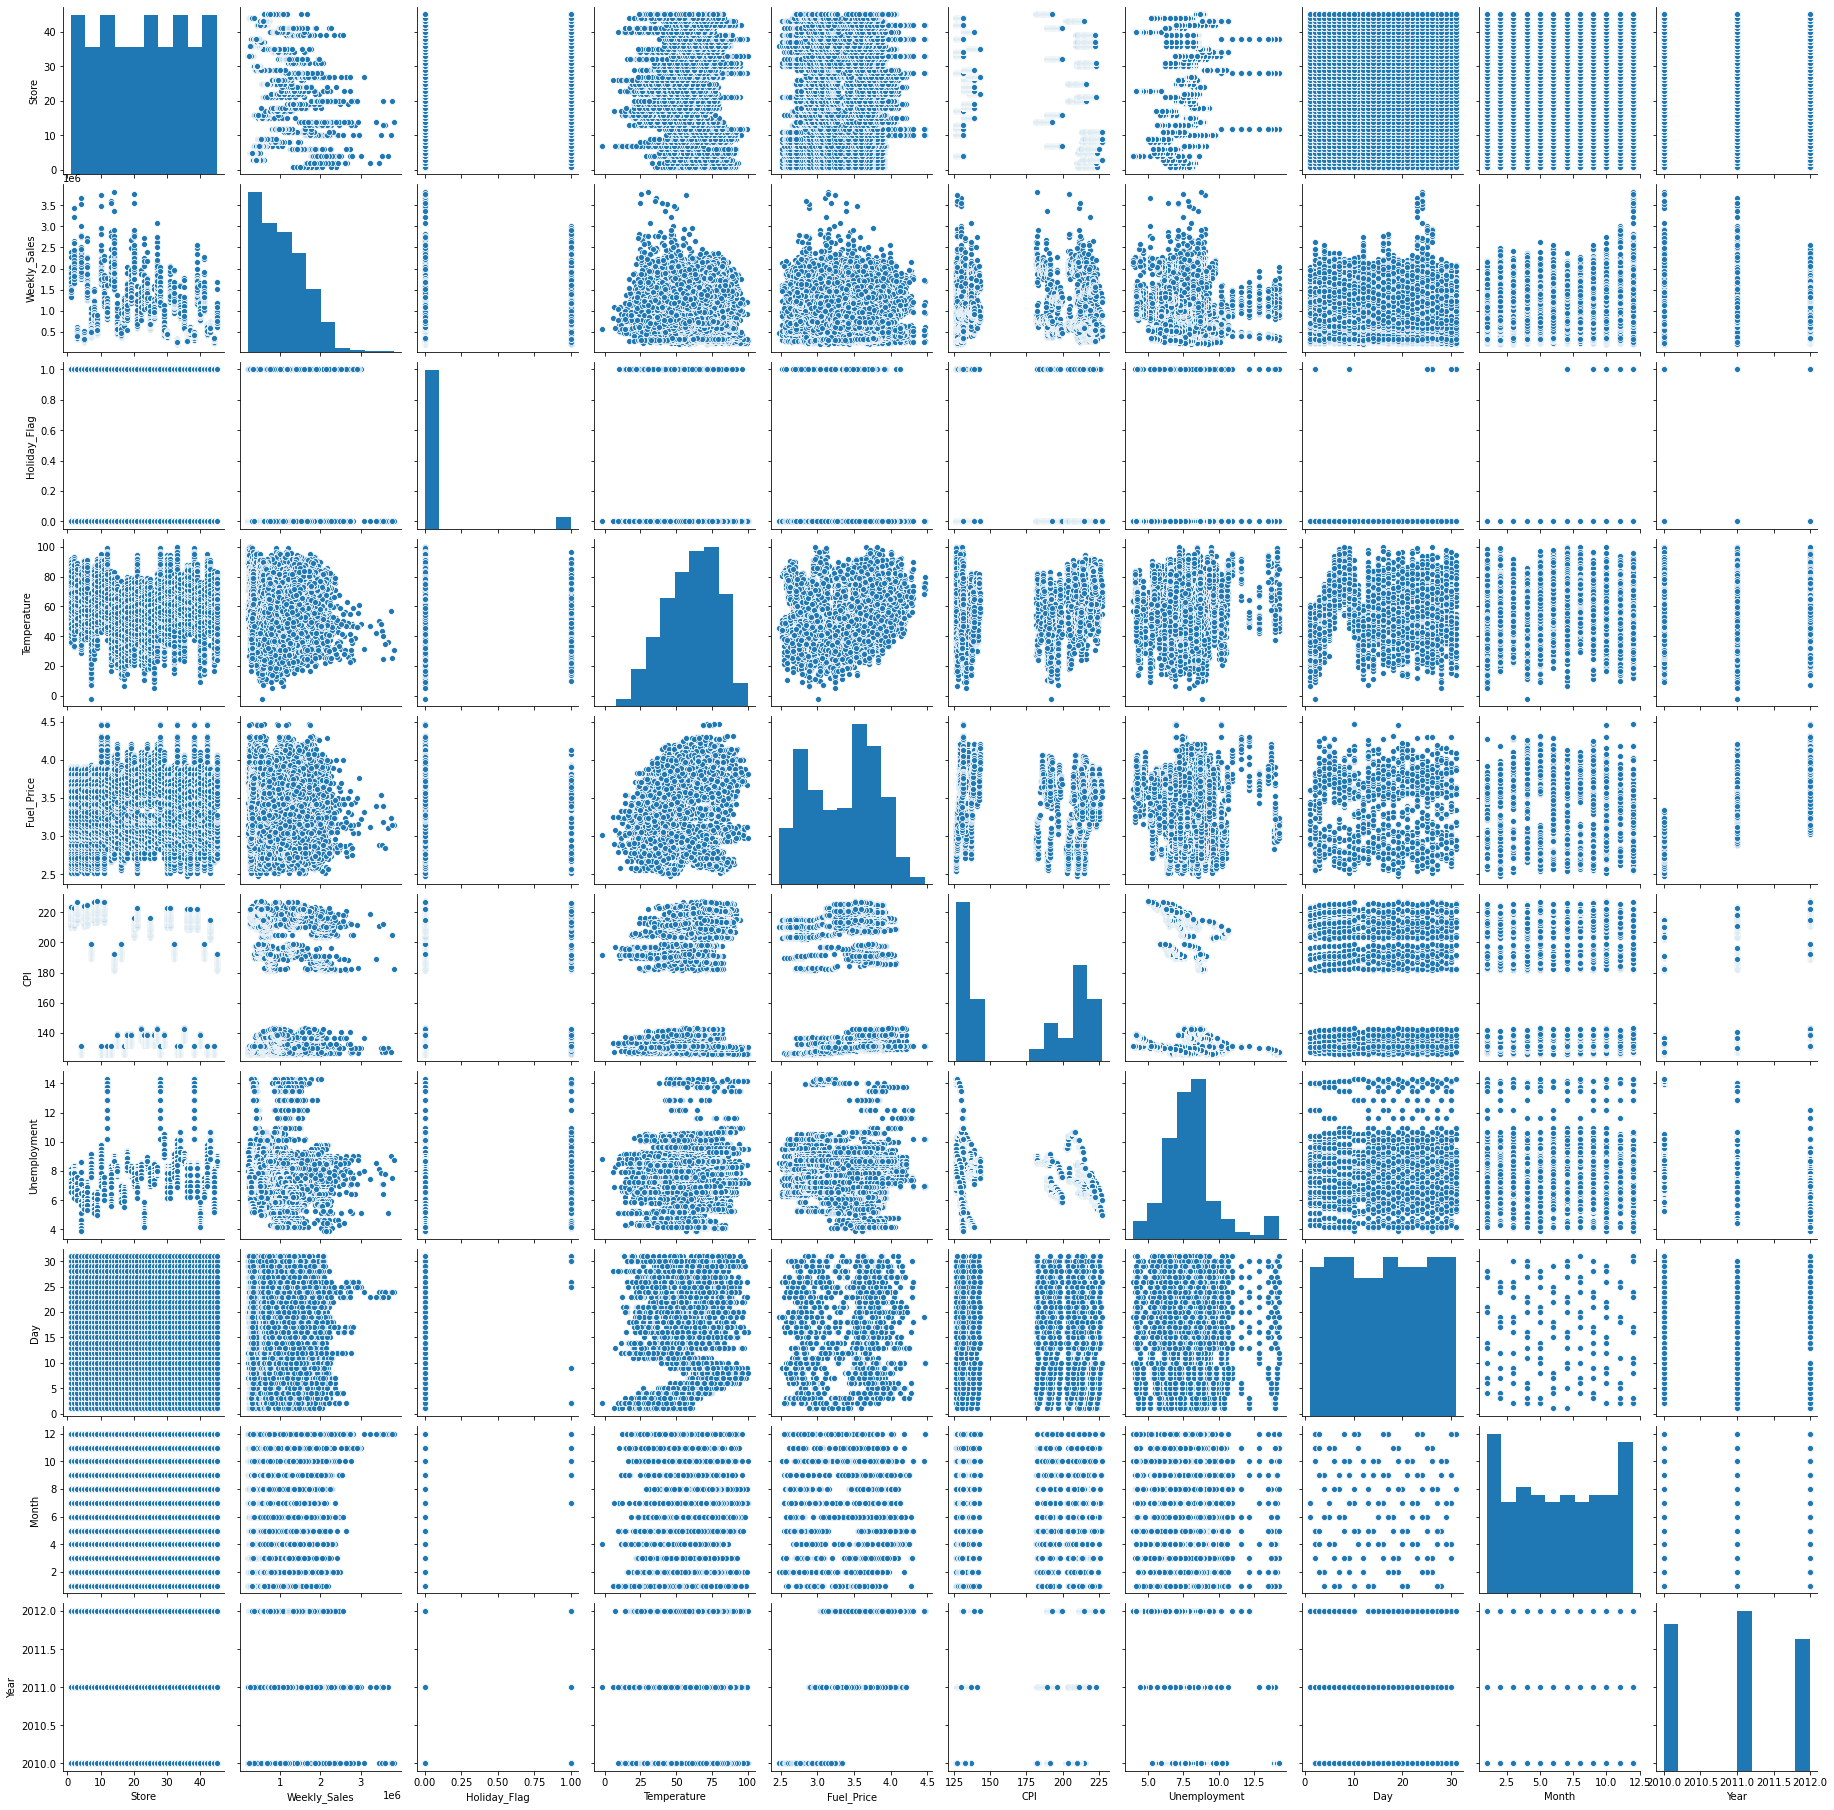

In [10]:
sns.pairplot(df,kind='scatter')

### Boxplot of the Weekly Sales. This gives the mean sales of 1000000 dollar, 25 th percentile and 75 th percentile

There are lots of outliers in the data of column 'Weekly_Sales'.

"The below box plot tells us that the weekly sales of the Walmart is $1046965 which is for all stores. Also, we can 
see that there are some outliers in the weekly sales. The outliers are very much above the maximum value of sales."


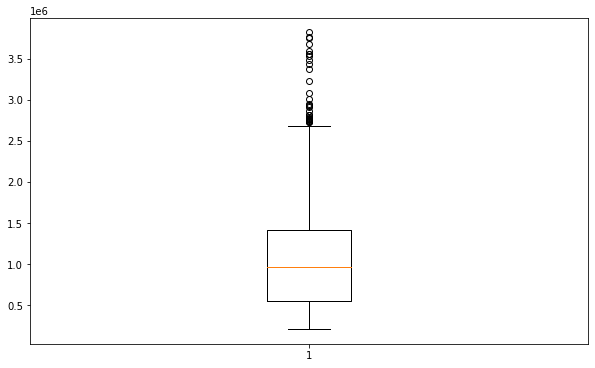

In [11]:
plt.figure(figsize=(10,6))
plt.boxplot(x='Weekly_Sales',data=df)
print('"The below box plot tells us that the weekly sales of the Walmart is $1046965 which is for all stores. Also, we can \nsee that there are some outliers in the weekly sales. The outliers are very much above the maximum value of sales."')

### Making  barplot for the weekly sales for holiday and non-holiday

This barplot shows the weekly sales (weekly sale x 10^6) on holiday and non-holiday


	 If we have holiday then sales are boosting up


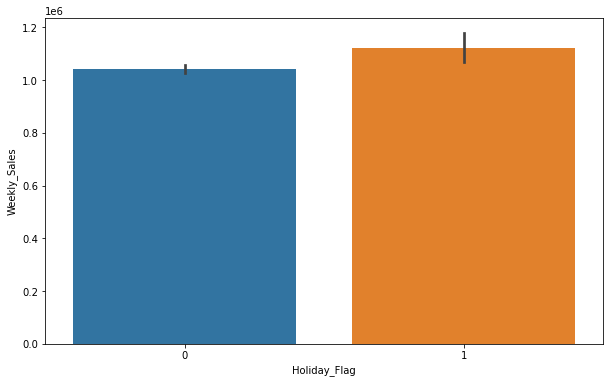

In [12]:
columns = ['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
plt.figure(figsize=(10,6))
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
print('')
print('\t If we have holiday then sales are boosting up')


	 There is not any linear relation in between the Weeky Sales and CPI


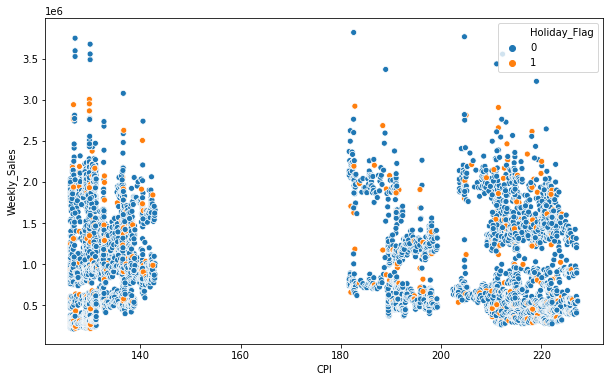

In [13]:
# This scatterplot tells us that the CPI is between 110 to 140 and 180 to 230 range for any sale.
plt.figure(figsize=(10,6))
sns.scatterplot(x='CPI',y=df['Weekly_Sales'],data=df,hue='Holiday_Flag')
print('')
print('\t There is not any linear relation in between the Weeky Sales and CPI')


	 There is not any relation in between the Weeky Sales and unemployment


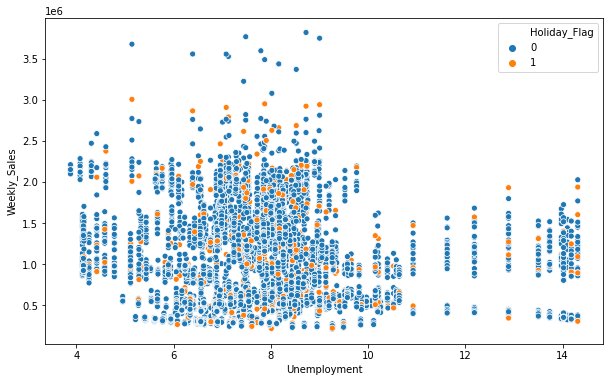

In [14]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Unemployment',y=df['Weekly_Sales'],data=df,hue='Holiday_Flag')
print('')
print('\t There is not any relation in between the Weeky Sales and unemployment')


	 There is not any relation in between the Weeky Sales and Fuel Price


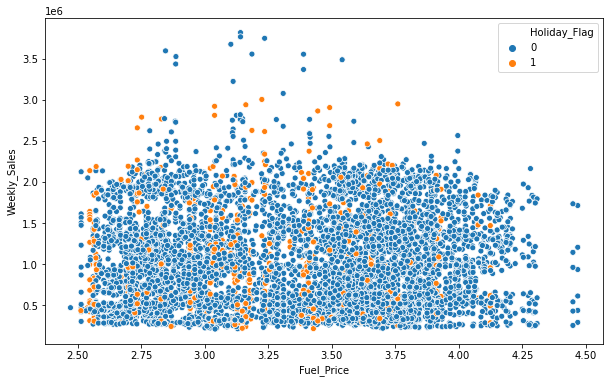

In [15]:
#We can see that the fuel price and weekly sales are not related as data is scattered
plt.figure(figsize=(10,6))

sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df,hue='Holiday_Flag')
print('')
print('\t There is not any relation in between the Weeky Sales and Fuel Price')

The sales were high in 2011 on holiday.
This is very strange that the sales peaked in 2011.


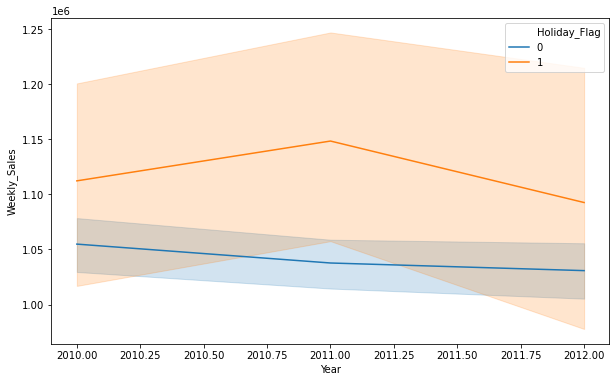

In [16]:
plt.figure(figsize=(10,6))

sns.lineplot(x=df['Year'],y='Weekly_Sales',data=df,hue='Holiday_Flag')
print('The sales were high in 2011 on holiday.')
print('This is very strange that the sales peaked in 2011.')

<Figure size 720x432 with 0 Axes>

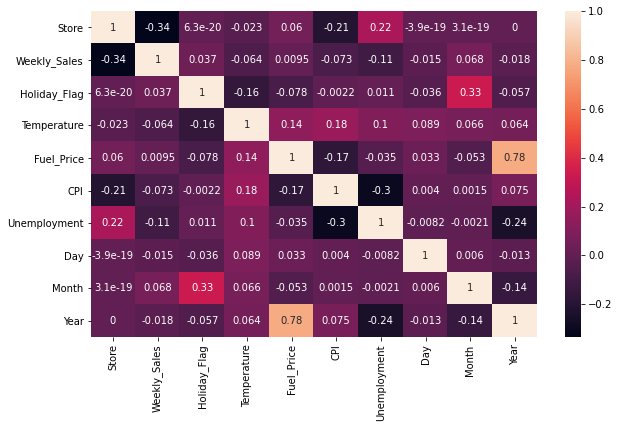

In [17]:
#From this heatmap we can infer that there is no co-relation between any of the variables.
plt.figure(figsize=(10,6))

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

1. As there is no relation, we cannot use the linear regression. So we have to predict the sales using any other algorithm.
2. Now we have performed exploratory data analysis of algorithms, we will compare linear regression and random forest algorithm for the model.

# 4. Modeling Phase

Importing libraries for preprocessing and modeling phase

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

With these columns we will perform Random Forest regression: Store, Holiday_Flag, Fuel_Price, CPI, Unemployment, Day , Month, Year

In [18]:
# Splitting Date and create new columns (Day, Month, and Year)
df['Day']= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

# Select features and target 
X = df[['Store','Holiday_Flag','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = df['Weekly_Sales']

### 4.2 Spliting dataset in Training and Testing dataset

In [19]:
# Split data to train and test (0.70:0.30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#Feature Scaling
#scaled_data = StandardScaler()
#X_train = scaled_data.fit_transform(X_train)
#X_test = scaled_data.fit_transform(X_test)

### 4.3 Normalizing the X variables using the MinMaxScaler


In [20]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

### 4.4 Building and  predicting model

### Linear regression

In [21]:
linear_regression = LinearRegression()   

linear_regression.fit(X_train,y_train)

y_pred_linear_regression = linear_regression.predict(X_test)

### Random Forest

In [22]:
random_forest = RandomForestRegressor(n_estimators = 800,max_depth=15,n_jobs=5)   

random_forest.fit(X_train,y_train)

y_pred = random_forest.predict(X_test)

# 6. Evaluation of Model

### 6.1 Evaluationg the accuracy of the Linear Regression

In [23]:
print('Linear Regression:')
print()
print('Accuracy:',linear_regression.score(X_test, y_test)*100)
print()
print('The score of linear regression is very less. We will calculate the score for Random Forest.')

Linear Regression:

Accuracy: 14.955731252870807

The score of linear regression is very less. We will calculate the score for Random Forest.


### 6.2 Evaluating the accuracy of the Random Forest

In [24]:
print('Random Forest Regressor:')
print()
print('Accuracy: \t\t',random_forest.score(X_test, y_test)*100)
print('')
print('Mean Absolute Error:\t', metrics.mean_absolute_error(y_test, y_pred))
print('')
print('Mean Squared Error:\t', metrics.mean_squared_error(y_test, y_pred))
print('')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('')
print('The accuracy of the model is increased if we apply the random forest on the model to 95% which is very good.')

Random Forest Regressor:

Accuracy: 		 95.06341874739175

Mean Absolute Error:	 67335.6957468363

Mean Squared Error:	 15864323854.907146

Root Mean Squared Error: 125953.65756859603

The accuracy of the model is increased if we apply the random forest on the model to 95% which is very good.


### 6.3 Plotting the predicted and actual values of the weekly sales of Walmart

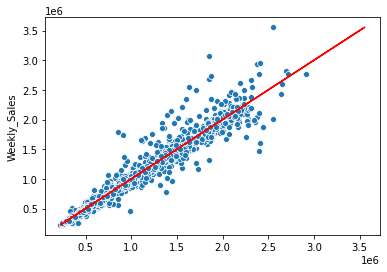

In [25]:
sns.scatterplot(y_pred, y_test)
plt.plot(y_test,y_test,'r')

In [26]:
print('The actual and the predicted values are very close. Difference between the actual and predicted values.')
print('')
data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(data.head())

The actual and the predicted values are very close. Difference between the actual and predicted values.

          Actual     Predicted
6159   280048.74  2.746027e+05
3891  1523410.71  1.434604e+06
5594  1052429.03  1.021658e+06
3602  1011938.29  1.023033e+06
4660   262407.57  2.549465e+05


### 6.4 Graph of error and n_estimators

	 In this graph as n_estimators increases the accuracy score increases after 20 and after n_estimators= 20 the score is constant.


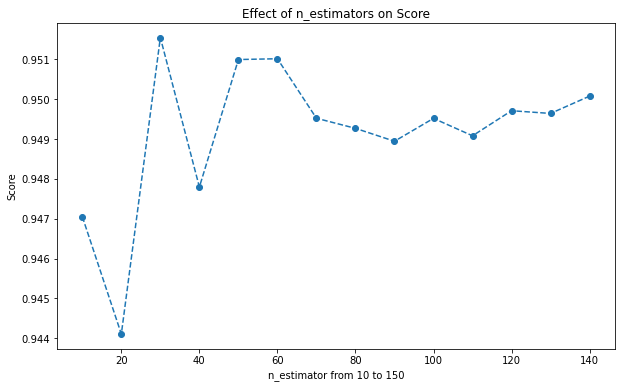

In [30]:
# Try different numbers of n_estimators - this will take a minute or so

estimators = np.arange(10, 150, 10)
scores = []
x = estimators
y = scores

for n in estimators:
    random_forest.set_params(n_estimators=n)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.title("Effect of n_estimators on Score")
plt.xlabel("n_estimator from 10 to 150")
plt.ylabel("Score")
plt.plot(estimators, scores,marker = 'o', linestyle = '--')

print('\t In this graph as n_estimators increases the accuracy score increases after 20 and after n_estimators= 20 the score is constant.')

In [28]:
print('All scores in the range of 10 to 150:')
print(pd.DataFrame(scores))

All scores in the range of 10 to 150:
           0
0   0.947100
1   0.948017
2   0.948881
3   0.949112
4   0.950391
5   0.949149
6   0.950965
7   0.948147
8   0.949477
9   0.949470
10  0.949953
11  0.950198
12  0.950852
13  0.949386


## Hypothesis Testing 

In this section I am going to find the basic hypothesis of:
### Whether the mean of weekly sales of walmart on holiday and weekly sales on Non holiday differ or not?
As the data is categorical we will use the t-test and not proportion test. Proportion test is used for categorical data. As we have sales which is numerical values, we will use 2 sample t-test.

#### Null Hypothesis H0: Mean of sales on holiday != Mean of sales on non-holiday (u holiday != u non-holiday)
#### Alternate Hypothesis Ha: Mean of sales on holiday = Mean of sales on non-holiday (u holiday = u non-holiday)

In [58]:
# Dividing the weekly sales in two data frames: Holiday sales and Non- holiday sales
groupby_holiday = df.groupby('Holiday_Flag')
for Holiday_Flag, holiday_df in groupby_holiday:
    print(Holiday_Flag)
    print(holiday_df)

0
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1      5/2/10    1643690.90             0        42.31       2.572   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1      5/3/10    1554806.68             0        46.50       2.625   
5         1     12/3/10    1439541.59             0        57.79       2.667   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45     5/10/12     733455.07             0        64.89       3.985   
6432     45    12/10/12     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  Day  

In [70]:
# Mean of weekly_sales on holiday and non-holiday

holiday_df = groupby_holiday.get_group(1)
non_holiday_df = groupby_holiday.get_group(0)

print('Mean of sales on holiday: \n \t\t\t',np.mean(holiday_df.Weekly_Sales))
print('Mean of sales on non-holiday:\n \t\t\t',np.mean(non_holiday_df.Weekly_Sales))

Mean of sales on holiday: 
 			 1122887.8923555554
Mean of sales on non-holiday:
 			 1041256.3802088564


In [86]:
# Standard deviation of the weekly sales on holiday and non-holiday

print('Std of sales on holiday: \n \t\t\t',np.std(holiday_df.Weekly_Sales))
print('Std of sales on non-holiday: \n \t\t\t',np.std(non_holiday_df.Weekly_Sales))

Std of sales on holiday: 
 			 626987.1162909395
Std of sales on non-holiday: 
 			 558910.7376689229


In [87]:
# Number of days holiday and non_holiday

print('Number of days holiday:',int(450))
print('Number of days non_holiday:',int(5985))

Number of days holiday: 450
Number of days non_holiday: 5985


In [88]:
pd.DataFrame(np.array())

TypeError: array() missing required argument 'object' (pos 1)

## Thank You!

626987.1162909395